# Wine Quality Prediction

### Importing the Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Data collection and preprocessing

In [5]:
wine_dataset=pd.read_csv('winequality-red.csv')

In [6]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# number of rows and columns
wine_dataset.shape

(1599, 12)

In [8]:
# check for missing values 
nan_count=wine_dataset.isna().sum()
print(nan_count)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Data Analysis and visualization

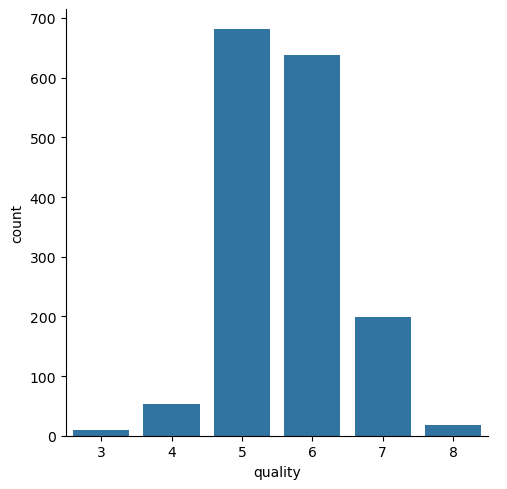

In [11]:
sns.catplot(x = "quality", data = wine_dataset, kind = "count")

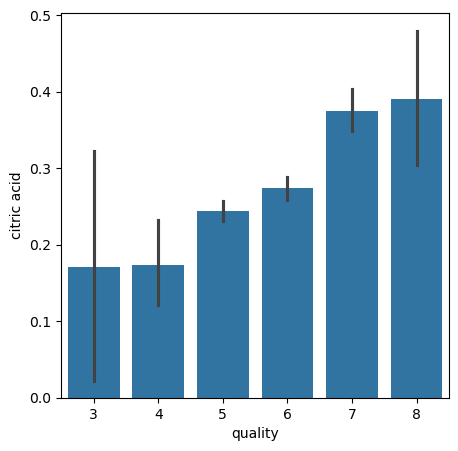

In [12]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "quality", y = "citric acid", data = wine_dataset)
plt.show()

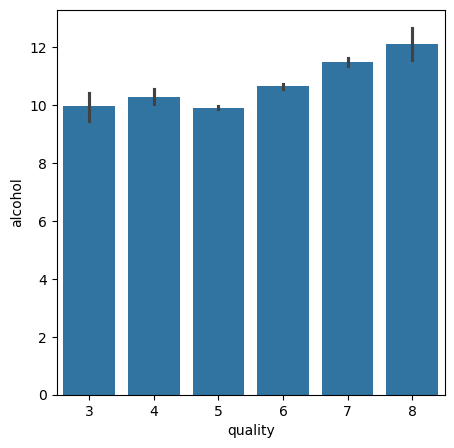

In [13]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "quality", y = "alcohol", data = wine_dataset)
plt.show()

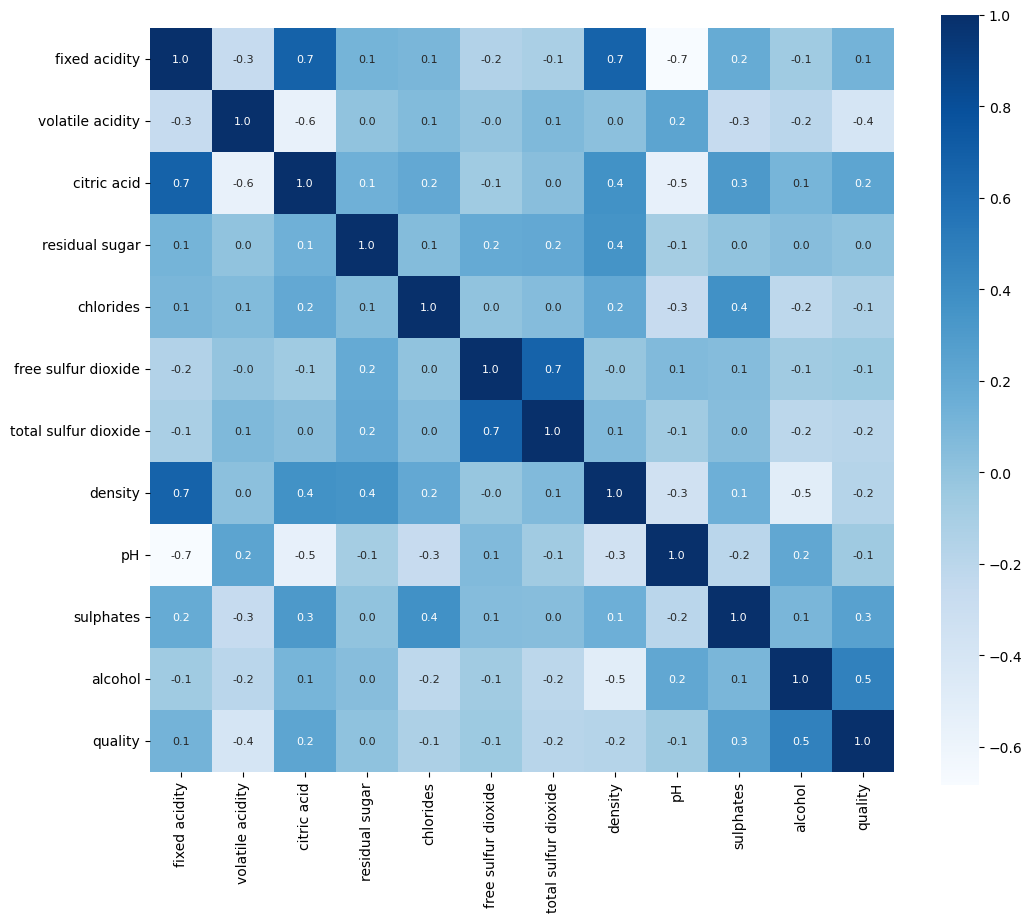

In [14]:
sns.set_palette("tab10") 
correlation_matrix = wine_dataset.corr()
plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.show()

In [15]:
X=wine_dataset.drop(columns='quality',axis=1)
Y=wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [16]:
print(X)
print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

### Split Train and Test data

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [19]:
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)

Total data:  (1599, 11)
Train data:  (1279, 11)
Test data:  (320, 11)


In [20]:
print(X_train)
print(Y_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1031            7.3             0.550         0.01             1.8      0.093   
1364            7.2             0.605         0.02             1.9      0.096   
649             6.7             0.420         0.27             8.6      0.068   
276             6.9             0.540         0.04             3.0      0.077   
792             7.1             0.610         0.02             2.5      0.081   
...             ...               ...          ...             ...        ...   
524             9.2             0.430         0.49             2.4      0.086   
1024            7.7             0.580         0.01             1.8      0.088   
1445            7.4             0.785         0.19             5.2      0.094   
1035           10.1             0.370         0.34             2.4      0.085   
141             8.3             0.715         0.15             1.8      0.089   

      free sulfur dioxide  

### Model Training using Random Forest

In [22]:
model=RandomForestClassifier()

In [23]:
model.fit(X_train,Y_train)

RandomForestClassifier()

### Model Evaluation

In [25]:
# accuracy score on the training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print(training_data_accuracy)

1.0


In [26]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on test data: ", test_data_accuracy)

Accuracy on test data:  0.928125


### Predictive System

In [28]:
Y_test.iloc[200]

0

In [29]:
X_test.iloc[200]

fixed acidity            7.6000
volatile acidity         0.6450
citric acid              0.0300
residual sugar           1.9000
chlorides                0.0860
free sulfur dioxide     14.0000
total sulfur dioxide    57.0000
density                  0.9969
pH                       3.3700
sulphates                0.4600
alcohol                 10.3000
Name: 1353, dtype: float64

In [30]:
sample=X_test.iloc[200].values

In [31]:
print(sample)

[7.600e+00 6.450e-01 3.000e-02 1.900e+00 8.600e-02 1.400e+01 5.700e+01
 9.969e-01 3.370e+00 4.600e-01 1.030e+01]


In [32]:
input_data=(sample)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)


In [33]:
print(input_data_reshaped)

[[7.600e+00 6.450e-01 3.000e-02 1.900e+00 8.600e-02 1.400e+01 5.700e+01
  9.969e-01 3.370e+00 4.600e-01 1.030e+01]]


In [34]:
prediction = model.predict(input_data_reshaped)
print(prediction)

[0]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
if(prediction[0] == 0):
    print("Poor Quality Wine.")
else:
    print("Good Quality Wine.")

Poor Quality Wine.
